In [1]:
# importing libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

# Q1. IMDB Top rate 100 Movies and Make DataFrame

In [2]:
import requests

imdb = 'https://www.imdb.com/list/ls056092300/'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(imdb, headers=headers)
print(response.text)


<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1725517238989);
        }
    })</script><title>100 Best Indian Films Till Date</title><meta name="description" content="Here is the list of 100 Best Indian Films till date" data-id="main"/><script type="application/ld+json">{"@type":"ItemList","itemListElement":[{"@type":"ListItem","item":{"@type":"Movie","url"

In [3]:
soup = BeautifulSoup(response.text, 'html.parser')
soup

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1725517238989);
        }
    })</script><title>100 Best Indian Films Till Date</title><meta content="Here is the list of 100 Best Indian Films till date" data-id="main" name="description"/><script type="application/ld+json">{"@type":"ItemList","itemListElement":[{"@type":"ListItem","item":{"@type":"Movie","url

In [4]:
movies=soup.find('div',class_="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml dli-title")
movies

<div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml dli-title"><a class="ipc-title-link-wrapper" href="/title/tt1773764/?ref_=ls_t_1" tabindex="0"><h3 class="ipc-title__text">1. Ship of Theseus</h3></a></div>

In [5]:
movies.text

'1. Ship of Theseus'

In [6]:
# movies names
movies_names=[]
for i in soup.find_all('div',class_="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml dli-title"):
    movies_names.append(i.text)
movies_names

['1. Ship of Theseus',
 '2. Iruvar',
 '3. Kaagaz Ke Phool',
 '4. Lagaan: Once Upon a Time in India',
 '5. Pather Panchali',
 '6. Charulata',
 '7. Rang De Basanti',
 '8. Dev.D',
 '9. 3 Idiots',
 '10. Awaara',
 '11. Nayakan',
 '12. Aparajito',
 '13. Pushpaka Vimana',
 '14. Pyaasa',
 '15. Ghatashraddha',
 '16. Sholay',
 '17. Aradhana',
 '18. Do Ankhen Barah Haath',
 '19. Bombay',
 '20. Neecha Nagar',
 '21. Do Bigha Zamin',
 '22. Garm Hava',
 '23. Piravi',
 '24. Mughal-E-Azam',
 '25. Amma Ariyan']

In [7]:
# ratings
ratings=[]
for i in soup.find_all('span',class_="ipc-rating-star--rating"):
    ratings.append(i.text)
ratings

['8.0',
 '8.4',
 '7.8',
 '8.1',
 '8.2',
 '8.1',
 '8.1',
 '7.9',
 '8.4',
 '7.8',
 '8.7',
 '8.2',
 '8.6',
 '8.3',
 '7.5',
 '8.1',
 '7.6',
 '8.4',
 '8.1',
 '6.6',
 '8.3',
 '8.0',
 '7.8',
 '8.1',
 '7.4']

In [8]:
# year of release
year_of_rel=[]
for i in soup.find_all('div',class_="sc-b189961a-7 btCcOY dli-title-metadata"):
    year_of_rel.append(i.text)
year_of_rel

['20122h 19mUA',
 '19972h 20mUA',
 '19592h 28mU',
 '20013h 44mU',
 '19552h 5mU',
 '19641h 57mU',
 '20062h 47mUA',
 '20092h 24mA',
 '20092h 50mUA',
 '19513h 13mU',
 '19872h 36mA',
 '19561h 50mU',
 '19872h 5mU',
 '19572h 26mU',
 '19772h 24mA',
 '19753h 24mU',
 '19692h 49mU',
 '19572h 23mU',
 '19952h 21mU',
 '19462h 2mU',
 '19532h 11mU',
 '19742h 26m(Banned)',
 '19891h 50mUnrated',
 '19603h 17mPG',
 '19861h 55m']

In [9]:
print(len(ratings),len(movies_names),len(year_of_rel))

25 25 25


In [10]:
# DataFrame
top_rate_movies=pd.DataFrame({'Movies Name':movies_names,"Ratings":ratings,'Year Of Realease':year_of_rel})
top_rate_movies

Movies Name Ratings    Year Of Realease
0                     1. Ship of Theseus     8.0        20122h 19mUA
1                              2. Iruvar     8.4        19972h 20mUA
2                     3. Kaagaz Ke Phool     7.8         19592h 28mU
3   4. Lagaan: Once Upon a Time in India     8.1         20013h 44mU
4                     5. Pather Panchali     8.2          19552h 5mU
5                           6. Charulata     8.1         19641h 57mU
6                     7. Rang De Basanti     8.1        20062h 47mUA
7                               8. Dev.D     7.9         20092h 24mA
8                            9. 3 Idiots     8.4        20092h 50mUA
9                             10. Awaara     7.8         19513h 13mU
10                           11. Nayakan     8.7         19872h 36mA
11                         12. Aparajito     8.2         19561h 50mU
12                   13. Pushpaka Vimana     8.6          19872h 5mU
13                            14. Pyaasa     8.3         19572h 26mU
14                     15. Ghatashraddha     7.5         19772h 24mA
15                            16. Sholay     8.1         19753h 24mU
16                          17. Aradhana     7.6         19692h 49mU
17             18. Do Ankhen Barah Haath     8.4         19572h 23mU
18                            19. Bombay     8.1         19952h 21mU
19                      20. Neecha Nagar     6.6          19462h 2mU
20                    21. Do Bigha Zamin     8.3         19532h 11mU
21                         22. Garm Hava     8.0  19742h 26m(Banned)
22                            23. Piravi     7.8   19891h 50mUnrated
23                     24. Mughal-E-Azam     8.1        19603h 17mPG
24                       25. Amma Ariyan     7.4          19861h 55m

# Q2 Pateron

In [11]:
import requests
from bs4 import BeautifulSoup

In [12]:
page = requests.get('https://www.patreon.com/coreyms')
page

<Response [200]>

In [13]:
soup = BeautifulSoup(page.content)
soup

<!DOCTYPE html>
<html><head><meta charset="utf-8"/><script type="text/javascript">
            window.patreonConfig = {"apiServer":"www.patreon.com/api","nionDisableDefaultIncludes":true,"formattingLocale":"en-US","eventLoggingPlatform":"Web","isWebView":false,"pathname":"/\u003cstring:campaign_identifier\u003e","is_impersonating":false,"csrfSignature":"xZGY4KVGouKZI5yDzorjwoE3wT1z5TX4SZZIwtaNtb0"};
          </script><meta content="width=device-width, initial-scale=1.0, viewport-fit=cover" name="viewport"/><meta content="artists, creators, patron, sponsor, music, videos" name="keywords"/><meta content="201564" property="fb:admins"/><meta content="130127590512253" property="fb:app_id"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="@Patreon" property="twitter:site"/><meta content="Patreon" property="og:site-name"/><meta content="Patreon" prefix="og: http://ogp.me/ns#" property="og:site_name"/><meta content="Patreon" name="apple-mobile-web-app-title"/><meta content

In [14]:
page.text

'<!DOCTYPE html><html><head><meta charSet="utf-8"/><script type="text/javascript">\n            window.patreonConfig = {"apiServer":"www.patreon.com/api","nionDisableDefaultIncludes":true,"formattingLocale":"en-US","eventLoggingPlatform":"Web","isWebView":false,"pathname":"/\\u003cstring:campaign_identifier\\u003e","is_impersonating":false,"csrfSignature":"xZGY4KVGouKZI5yDzorjwoE3wT1z5TX4SZZIwtaNtb0"};\n          </script><meta name="viewport" content="width=device-width, initial-scale=1.0, viewport-fit=cover"/><meta content="artists, creators, patron, sponsor, music, videos" name="keywords"/><meta property="fb:admins" content="201564"/><meta property="fb:app_id" content="130127590512253"/><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta property="twitter:site" content="@Patreon"/><meta property="og:site-name" content="Patreon"/><meta prefix="og: http://ogp.me/ns#" property="og:site_name" content="Patreon"/><meta name="apple-mobile-web-app-title" content="Patreon"/><meta nam

In [15]:
heading=soup.find('div',class_='sc-bBHxTw jIEOUn')
heading

In [16]:
headings=[]
for i in soup.find_all('div',class_='sc-bBHxTw jIEOUn'):
    headings.append(i.text)
headings

[]

In [17]:
dates=[]
for i in soup.find_all('span',id_="track-click"):
    dates.append(i.text)
dates

[]

# Q3 No Broker

In [30]:
broker=requests.get('https://www.nobroker.in/')
broker

<Response [200]>

<!DOCTYPE html>
<html lang="en"><head>
<meta content="794951570520699" property="fb:pages"/>
<link href="https://www.nobroker.in" rel="canonical"/>
<link href="//www.googletagmanager.com" rel="dns-prefetch preconnect"/>
<link href="//www.google-analytics.com" rel="dns-prefetch preconnect"/>
<link href="//assets.nobroker.in" rel="dns-prefetch"/>
<link href="//images.nobroker.in" rel="dns-prefetch"/>
<link href="https://assets.adobedtm.com" rel="dns-prefetch preconnect"/>
<link href="//assets.nobroker.in/static/img/favicon.png" id="favicon" rel="shortcut icon"/>
<link href="https://images.nobroker.in/static/img/fav64.png" rel="apple-touch-icon"/>
<link href="https://hs.nobroker.in" rel="dns-prefetch preconnect"/>
<!--<meta charset="utf-8"/>-->
<meta charset="utf-8"/>
<meta content="app-id=com.nobroker.app&amp;referrer=utm_source%3Dnobroker%26utm_medium%3DmobileWeb" name="google-play-app"/>
<meta content="app-id=1200507100, app-argument=nobrokerapp://" name="apple-itunes-app"/>
<meta cont
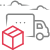
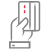
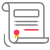
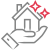
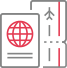
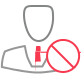
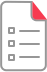
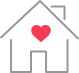
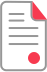
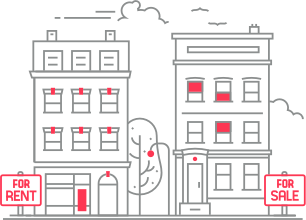

In [31]:
soup=BeautifulSoup(broker.content)
soup

'\n          <!DOCTYPE html><html lang="en"><head>\n          <meta property="fb:pages" content="794951570520699" />\n          <link rel="canonical" href="https://www.nobroker.in" />\n          \n        \n          \n          <link rel="dns-prefetch preconnect" href="//www.googletagmanager.com">\n          <link rel="dns-prefetch preconnect"  href="//www.google-analytics.com">\n          <link rel="dns-prefetch" href="//assets.nobroker.in">\n          <link rel="dns-prefetch" href="//images.nobroker.in">\n          <link rel="dns-prefetch preconnect" href="https://assets.adobedtm.com" />\n          <link rel="shortcut icon" id="favicon" href="//assets.nobroker.in/static/img/favicon.png"/>\n          <link rel="apple-touch-icon" href="https://images.nobroker.in/static/img/fav64.png">\n          <link rel="dns-prefetch preconnect" href="https://hs.nobroker.in">\n          <!--<meta charset="utf-8"/>-->\n          <meta charset="UTF-8"/>\n          <meta name="google-play-app" content=
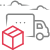
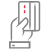
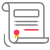
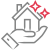
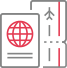
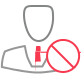
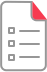
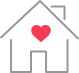
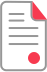
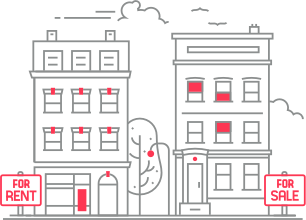

In [32]:
broker.text

In [40]:
house_titles=soup.find('div',class_="flex flex-col flex-2 w-pe mt-1.8px po:justify-center po:p-1p po:mt-0 w-70pe")
house_titles

In [34]:
housetitle=[]
for i in soup.find_all('div',class_="flex flex-col flex-2 w-pe mt-1.8px po:justify-center po:p-1p po:mt-0 w-70pe"):
    housetitle.append(i.text)
housetitle

[]

In [35]:
locations=[]
for i in soup.find_all('span',class_="overflow-hidden overflow-ellipsis whitespace-nowrap text-13 text-gray-lightest"):
    locations.append(i.text)
locations

[]

In [36]:
areas=[]
for i in soup.find_all('div',class_="flex flex-col items-center w-33pe tp:w-half po:w-full "):
    areas.append(i.text)
areas

[]

In [37]:
emi=[]
for i in soup.find_all('div',class_="flex flex-col items-center border-r w-33pe bo tp:w-half po:w-full border-r-solid border-card-overview-border-color last:border-r-1 "):
    emi.append(i.text)
emi

[]

In [38]:
prices=[]
for i in soup.find_all('div',class_="flex flex-col items-center border-r w-33pe bo tp:w-half po:w-full border-r-solid border-card-overview-border-color last:border-r-1"):
    prices.append(i.text)
prices

[]

# Q4 BewaKoof

In [42]:
clothes=requests.get('https://shop.bewakoof.com/men-clothing')
clothes

<Response [200]>

In [43]:
soup=BeautifulSoup(clothes.content)
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><meta content="o7KS3-fVt15m4Cc1HeYh5HIpv532A4FvvYQzIf-LnsQ" name="google-site-verification"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/><meta content="no-cache" http-equiv="Pragma"/><meta content="0" http-equiv="Expires"/><meta content="EA3F0DC751089224F0A97C414E310BE8" name="msvalidate.01"/><meta content="140947639712-ukpgitufo1i1gc6nmd8o1l14tcu72nt2.apps.googleusercontent.com" name="google-signin-client_id"/><link href="https://plus.google.com/+Bewakoof/" rel="publisher"/><meta content="Bewakoof" name="application-name"/><meta content="#ffc40d" name="msapplication-TileColor"/><meta content="https://images.bewakoof.com/lib/icon/app-logo.png" name="msapplication-TileImage"/><meta content="https://files.bewakoof.com/lib/default/images_css/browserconfig.xml" name="msapplica

In [44]:
soup.text

"Online Fashion Shopping for Men, Women, Accessories - Bewakoof.com Clothes for Men4324 ProductsMenWomenMobile Covers|LOGINHomeMen ClothingFiltersClothes for Men4324 Products bewakoof x marvelMen's Green Eddie Brock Graphic Printed Oversized T-shirt₹699₹1,49953% off₹639 For TriBe Members100% COTTONbewakoof x marvelMen's Skipper Blue Venom Graphic Printed Oversized Acid Wash T-shirt₹999₹2,14953% off₹919 For TriBe Members100% COTTON4.5 Bewakoof®Men's Black T-shirt₹549₹99945% off₹509 For TriBe Members100% COTTON4.6 bewakoof x marvelMen's Black Scarlet Spider Graphic Printed Oversized T-shirt₹599₹1,79966% off₹559 For TriBe Members100% COTTON4.4 Bewakoof®Men's Black Underground Graphic Printed Oversized T-shirt₹699₹1,79961% off₹649 For TriBe Members100% COTTONbewakoof x dcMen's Black Adam Graphic Printed T-shirt₹499₹99950% off₹459 For TriBe Members100% COTTON4.4 bewakoof x peanutsMen's Black Need Space Snoopy Graphic Printed Oversized T-shirt₹699₹1,29946% off₹639 For TriBe Members100% COTTO

In [62]:
name=soup.find('span',class_="sc-a6c4ca6a-0 PYPED")
name

<span class="sc-a6c4ca6a-0 PYPED" color="#4E5664" type="sm" variant="medium">Men's Green Eddie Brock Graphic Printed Oversized T-shirt</span>

In [63]:
tshirts_name=[]
for i in soup.find_all('span',class_="sc-a6c4ca6a-0 PYPED"):
    tshirts_name.append(i.text)
x=pd.DataFrame(tshirts_name)
x.head(10)

0
0  Men's Green Eddie Brock Graphic Printed Oversi...
1  Men's Skipper Blue Venom Graphic Printed Overs...
2                                Men's Black T-shirt
3  Men's Black Scarlet Spider Graphic Printed Ove...
4  Men's Black Underground Graphic Printed Oversi...
5           Men's Black Adam Graphic Printed T-shirt
6  Men's Black Need Space Snoopy Graphic Printed ...
7  Men's Blue Roaring Beast Graphic Printed Overs...
8  Men's Black Ocean Child Graphic Printed Oversi...
9         Men's Black Customizable Oversized T-shirt

In [70]:
price=[]
for i in soup.find_all('div',class_="product-card_product_price_container__Ek01t"):
    prices.append(i.text.replace('₹',''))
y=pd.DataFrame(prices)
y.head(10)

0
0  ₹699
1  ₹999
2  ₹549
3  ₹599
4  ₹699
5  ₹499
6  ₹699
7  ₹599
8  ₹699
9  ₹699

In [58]:
img=[]
for i in soup.find_all('img',draggable='false'):
    img.append(i['src']) # data-src when we want to scrap the images URL's
z=pd.DataFrame(img)
z.head(10)

0
0  https://images.bewakoof.com/t640/men-s-green-e...
1  https://images.bewakoof.com/t640/men-s-skipper...
2  https://images.bewakoof.com/t640/men-s-black-t...
3  https://images.bewakoof.com/t640/men-s-black-s...
4  https://images.bewakoof.com/t640/men-s-black-u...
5                   /images/fallback-placeholder.svg
6                   /images/fallback-placeholder.svg
7                   /images/fallback-placeholder.svg
8                   /images/fallback-placeholder.svg
9                   /images/fallback-placeholder.svg

In [71]:
print(len(img),len(tshirts_name),len(prices))

20 20 240


# Q5 CNBC

In [78]:
import requests
from bs4 import BeautifulSoup

# URL of the website
url = 'https://www.cnbc.com/world/?region=world'

# Send a request to fetch the HTML content of the page
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}
response = requests.get(url, headers=headers)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find all article containers
articles = soup.find_all('div', class_='Card-titleContainer')

# Loop through the articles to extract the heading, date, and link
news_data = []
for article in articles:
    news_item = {}
    
    # Extract heading
    heading_tag = article.find('a')
    heading = heading_tag.text.strip() if heading_tag else "No Heading"
    news_item['heading'] = heading
    
    # Extract link
    news_link = heading_tag['href'] if heading_tag else "No Link"
    news_item['link'] = news_link

    # Extract date (often present in the 'time' tag)
    date_tag = article.find('time')
    date = date_tag.text.strip() if date_tag else "No Date"
    news_item['date'] = date

    news_data.append(news_item)

# Print the news details
for idx, news in enumerate(news_data, start=1):
    print(f"News {idx}:")
    print(f"Heading: {news['heading']}")
    print(f"Date: {news['date']}")
    print(f"Link: {news['link']}")
    print("-" * 50)


News 1:
Heading: Treasury yields little changed as jobs data comes into focus
Date: No Date
Link: https://www.cnbc.com/2024/09/05/us-treasury-yields-as-jobs-data-comes-into-focus.html
--------------------------------------------------
News 2:
Heading: Stock futures are flat after two straight down days for S&P 500, Nasdaq: Live updates
Date: No Date
Link: https://www.cnbc.com/2024/09/04/stock-market-today-live-updates.html
--------------------------------------------------
News 3:
Heading: Stocks making the biggest moves after hours: C3.ai, Topgolf Callaway, Verint Systems and more
Date: No Date
Link: https://www.cnbc.com/2024/09/04/stocks-making-the-biggest-moves-after-hours-ai-modg-vrnt.html
--------------------------------------------------
News 4:
Heading: 'Get Britain building again': New UK finance chief restores housing targets
Date: No Date
Link: https://www.cnbc.com/2024/07/08/uk-election-2024-rachel-reeves-announces-growth-measures.html
---------------------------------------

# Q6 KeAi

In [81]:
article=requests.get('https://www.keaipublishing.com/en/journals/artificial-intelligence-in-agriculture/most-downloaded-articles/')
article

<Response [200]>

In [82]:
soup=BeautifulSoup(article.content)
soup

<!DOCTYPE html>
<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="ie=edge" http-equiv="X-UA-Compatible"/><script type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"beacon":"bam.eu01.nr-data.net","errorBeacon":"bam.eu01.nr-data.net","licenseKey":"NRJS-70b3f9b2c6f17cc4471","applicationID":"304294210","transactionName":"MhBSZQoZWhdTVUYLDQtafWc7V3YBQUZdCQc1GlRyFxZAFl1aXgcQSjdVQggXXwFiWVY=","queueTime":0,"applicationTime":51,"agent":"","atts":""}</script><script type="text/javascript">(window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["bam.eu01.nr-data.net"]},distributed_tracing:{enabled:true}};(window.NREUM||(NREUM={})).loader_config={agentID:"322544468",accountID:"2916063",trustKey:"2916063",xpid:"Vg8GV1ZVCxADVFVQDgUFV1Q=",licenseKey:"NRJS-70b3f9b2c6f17cc4471",applicationID:"304294210"};;/*! For license information please see nr-loader-spa-1.264

In [83]:
article.text

'\r\n\r\n\r\n<!DOCTYPE html>\r\n<html lang="en-GB">\r\n<head>\r\n    <meta charset="utf-8">\r\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\r\n    <meta http-equiv="X-UA-Compatible" content="ie=edge"><script type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"beacon":"bam.eu01.nr-data.net","errorBeacon":"bam.eu01.nr-data.net","licenseKey":"NRJS-70b3f9b2c6f17cc4471","applicationID":"304294210","transactionName":"MhBSZQoZWhdTVUYLDQtafWc7V3YBQUZdCQc1GlRyFxZAFl1aXgcQSjdVQggXXwFiWVY=","queueTime":0,"applicationTime":51,"agent":"","atts":""}</script><script type="text/javascript">(window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:true},ajax:{deny_list:["bam.eu01.nr-data.net"]},distributed_tracing:{enabled:true}};(window.NREUM||(NREUM={})).loader_config={agentID:"322544468",accountID:"2916063",trustKey:"2916063",xpid:"Vg8GV1ZVCxADVFVQDgUFV1Q=",licenseKey:"NRJS-70b3f9b2c6f17cc4471",applicationID:"304294210"};;/*! For license infor

In [87]:
page=[]
for i in soup.find_all('h2',class_="h5 article-title"):
    page.append(i.text.replace('\n\r\n',''))
page

['                    Implementation of artificial intelligence in agriculture for optimisation of irrigation and application of pesticides and herbicides\r\n                \n',
 '                    Review of agricultural IoT technology\r\n                \n',
 '                    Automation and digitization of agriculture using artificial intelligence and internet of things\r\n                \n',
 '                    A comprehensive review on automation in agriculture using artificial intelligence\r\n                \n',
 '                    Applications of electronic nose (e-nose) and electronic tongue (e-tongue) in food quality-related properties determination: A review\r\n                \n',
 '                    Towards sustainable agriculture: Harnessing AI for global food security\r\n                \n',
 '                    Fruit ripeness classification: A survey\r\n                \n',
 '                    Deep learning based computer vision approaches for smart agric

In [88]:
date=[]
for i in soup.find_all('p',class_="article-date"):
    date.append(i.text)
date

['2020',
 '2022',
 '2021',
 'June 2019',
 '2020',
 'June 2024',
 'March 2023',
 '2022',
 '2020',
 '2022',
 'September 2023',
 'March 2024',
 'September 2024',
 'September 2024',
 'March 2024',
 'June 2023',
 'June 2024',
 '2021',
 'June 2024',
 'September 2024',
 '2022',
 'September 2023',
 '2022',
 '2020',
 '2022']

In [89]:
Author=[]
for i in soup.find_all('p',class_="article-authors"):
    Author.append(i.text)
Author

[' Tanha Talaviya |  Dhara Shah |  Nivedita Patel |  Hiteshri Yagnik |  Manan Shah',
 ' Jinyuan Xu |  Baoxing Gu |  Guangzhao Tian',
 ' A. Subeesh |  C.R. Mehta',
 ' Kirtan Jha |  Aalap Doshi |  Poojan Patel |  Manan Shah',
 ' Juzhong Tan |  Jie Xu',
 ' Dhananjay K. Pandey |  Richa Mishra',
 ' Matteo Rizzo |  Matteo Marcuzzo |  Alessandro Zangari |  Andrea Gasparetto |  Andrea Albarelli',
 ' V.G. Dhanya |  A. Subeesh |  N.L. Kushwaha |  Dinesh Kumar Vishwakarma |  T. Nagesh Kumar |  G. Ritika |  A.N. Singh',
 ' Vijai Singh |  Namita Sharma |  Shikha Singh',
 ' Ananda S. Paymode |  Vandana B. Malode',
 ' Md Taimur Ahad |  Yan Li |  Bo Song |  Touhid Bhuiyan',
 ' P. Isaac Ritharson |  Kumudha Raimond |  X. Anitha Mary |  Jennifer Eunice Robert |  Andrew J',
 ' Sumaira Ghazal |  Arslan Munir |  Waqar S. Qureshi',
 ' Juan Felipe Restrepo-Arias |  John W. Branch-Bedoya |  Gabriel Awad',
 ' Baoling Ma |  Zhixin Hua |  Yuchen Wen |  Hongxing Deng |  Yongjie Zhao |  Liuru Pu |  Huaibo Song',
 

In [90]:
data=pd.DataFrame({'Page Title':page,'Dates':date,'Author Names':Author})
data

Page Title           Dates  \
0                       Implementation of artifici...            2020   
1                       Review of agricultural IoT...            2022   
2                       Automation and digitizatio...            2021   
3                       A comprehensive review on ...       June 2019   
4                       Applications of electronic...            2020   
5                       Towards sustainable agricu...       June 2024   
6                       Fruit ripeness classificat...      March 2023   
7                       Deep learning based comput...            2022   
8                       A review of imaging techni...            2020   
9                       Transfer Learning for Mult...            2022   
10                      Comparison of CNN-based de...  September 2023   
11                      DeepRice: A deep learning ...      March 2024   
12                      Computer vision in smart a...  September 2024   
13                      Image classification on sm...  September 2024   
14                      Using an improved lightwei...      March 2024   
15                      How artificial intelligenc...       June 2023   
16                      LeafSpotNet: A deep learni...       June 2024   
17                      Plant disease detection us...            2021   
18                      Cross-comparative review o...       June 2024   
19                      A comprehensive survey on ...  September 2024   
20                      A systematic review of mac...            2022   
21                      Machine learning in nutrie...  September 2023   
22                      Deep convolutional neural ...            2022   
23                      A review on computer visio...            2020   
24                      Explainable artificial int...            2022   

                                         Author Names  
0    Tanha Talaviya |  Dhara Shah |  Nivedita Pate...  
1          Jinyuan Xu |  Baoxing Gu |  Guangzhao Tian  
2                            A. Subeesh |  C.R. Mehta  
3    Kirtan Jha |  Aalap Doshi |  Poojan Patel |  ...  
4                               Juzhong Tan |  Jie Xu  
5                 Dhananjay K. Pandey |  Richa Mishra  
6    Matteo Rizzo |  Matteo Marcuzzo |  Alessandro...  
7    V.G. Dhanya |  A. Subeesh |  N.L. Kushwaha | ...  
8        Vijai Singh |  Namita Sharma |  Shikha Singh  
9              Ananda S. Paymode |  Vandana B. Malode  
10   Md Taimur Ahad |  Yan Li |  Bo Song |  Touhid...  
11   P. Isaac Ritharson |  Kumudha Raimond |  X. A...  
12   Sumaira Ghazal |  Arslan Munir |  Waqar S. Qu...  
13   Juan Felipe Restrepo-Arias |  John W. Branch-...  
14   Baoling Ma |  Zhixin Hua |  Yuchen Wen |  Hon...  
15            Vilani Sachithra |  L.D.C.S. Subhashini  
16         Shwetha V |  Arnav Bhagwat |  Vijaya Laxmi  
17                         Punam Bedi |  Pushkar Gole  
18   James Daniel Omaye |  Emeka Ogbuju |  Grace A...  
19   Faisal Dharma Adhinata |   Wahyono |  Raden S...  
20   Md Ekramul Hossain |  Muhammad Ashad Kabir | ...  
21   Oumnia Ennaji |  Leonardus Vergütz |  Achraf ...  
22   A. Subeesh |  S. Bhole |  K. Singh |  N.S. Ch...  
23   Cedric Okinda |  Innocent Nyalala |  Tchalla ...  
24                                       Masahiro Ryo